<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Lab6/Otros_Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/content/drive/My Drive/Laboratorio6/Glyphs_TMNIST_updated.csv'
data = pd.read_csv(file_path)

# Tomar una cuarta parte de los datos
data_sample = data.sample(frac=0.125, random_state=42)

# Eliminar la primera y segunda columna
data_sample = data_sample.iloc[:, 2:]

X= data_sample.drop(columns=['label']).values
y = data_sample['label'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))


Training Data: (56529, 784)
Training Labels: (56529,)
Testing Data: (14133, 784)
Testing Labels: (14133,)


In [3]:
print("Tamaño de X:", X.shape)


Tamaño de X: (70662, 784)


In [4]:
print("Tamaño de y:", y.shape)

Tamaño de y: (70662,)


In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
best_kmeans.score(X)

-179451285021.43353

# **Aprendizaje semi supervisado**

In [5]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
import numpy as np

idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = x_train[idxs]


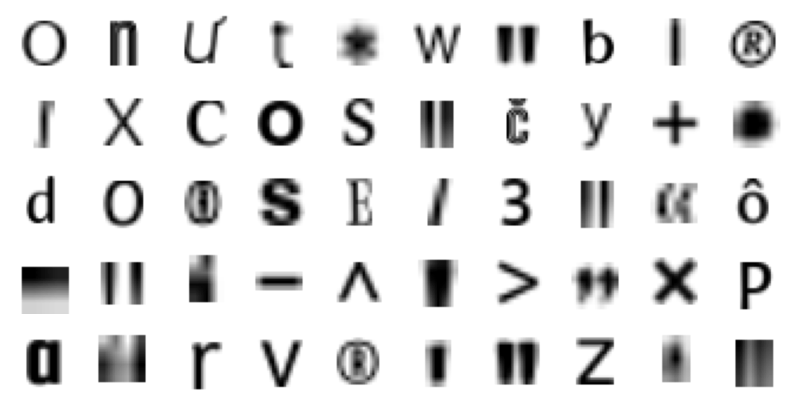

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(5, 10, index+1)
  plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  plt.axis('off')
plt.show()

In [8]:
y_representative_digits = y_train[idxs]


In [9]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(x_test, y_test)

CPU times: user 663 ms, sys: 482 ms, total: 1.15 s
Wall time: 605 ms


0.08922380244817095

In [10]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(x_train[:50], y_train[:50])
log_reg.score(x_test, y_test)

CPU times: user 704 ms, sys: 499 ms, total: 1.2 s
Wall time: 646 ms


0.08094530531380457

In [11]:
# Crear un arreglo vacío de tipo objeto para y_train_propagated
y_train_propagated = np.empty(len(x_train), dtype=object)

for i in range(k):
    # Filtrar los clústeres y asignar las etiquetas representativas correspondientes
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]


In [12]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(x_train[:1000], y_train_propagated[:1000])
log_reg3.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 31.6 s, sys: 12 s, total: 43.6 s
Wall time: 27.4 s


0.08412934267317626

# **Aprendisaje Activo**

In [13]:
probas = log_reg3.predict_proba(x_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.99770432, 0.99893084, 0.9989662 , 0.99903684, 0.99913879,
       0.99918147, 0.99922333, 0.99924826, 0.99930003, 0.99938955])

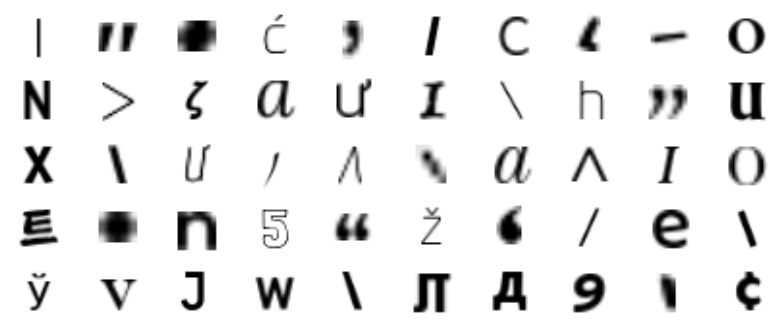

In [14]:
X_lowest = x_train[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()


In [15]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array(['|', '"', '.', 'ć', ',', 'I', 'с', '‘', '-', 'O', 'N', '>', 'ζ',
       'а', 'ư', 'I', '\\', 'h', '”', 'U', 'χ', '\\', 'ư', '/', '^', '`',
       'а', '^', 'I', 'o', '트', '.', 'n', '5', '“', 'ž', '‘', '/', 'e',
       '\\', 'Ў', 'v', 'J', 'w', '\\', 'π', 'Д', '9', '‘', '¢'],
      dtype=object)

In [16]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [17]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(x_train[:1000], y_train2)
log_reg5.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 38.3 s, sys: 16.8 s, total: 55 s
Wall time: 41.9 s


0.09021439184886436

# **DBSCAN**

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [42]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

In [43]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([-1,  0,  1,  2,  3])

In [44]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

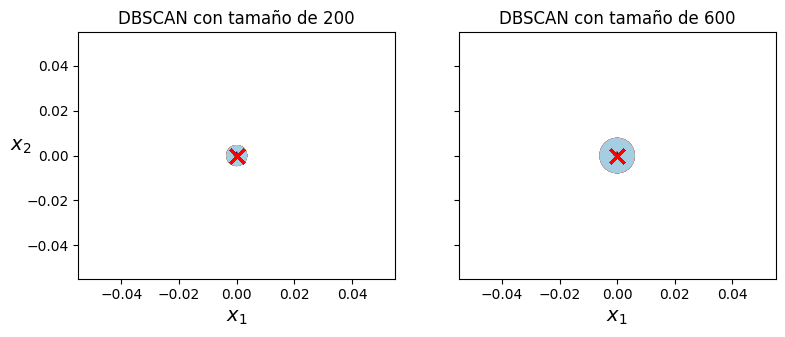

In [45]:
import matplotlib.pyplot as plt

# Definir tus objetos dbscan y plot_dbscan() aquí

plt.figure(figsize=(9, 3.2))

# Primer subplot
plt.subplot(121)
plot_dbscan(dbscan, X, size=200)
plt.title('DBSCAN con tamaño de 200')

# Segundo subplot
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.title('DBSCAN con tamaño de 600')
plt.show()



In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Supongamos que ya tienes un modelo knn entrenado previamente
# y tienes los datos de entrenamiento X_train y las etiquetas y_train

# Crear un nuevo conjunto de datos de prueba con las mismas características que el conjunto de entrenamiento
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

# Si el modelo espera 784 características, necesitas ajustar los datos de prueba para que tengan el mismo número de características
# Aquí simplemente concatenaremos ceros para que coincida con la cantidad de características esperadas por el modelo
n_caracteristicas_esperadas = 784
n_muestras, n_caracteristicas = X_new.shape
if n_caracteristicas < n_caracteristicas_esperadas:
    X_new = np.hstack((X_new, np.zeros((n_muestras, n_caracteristicas_esperadas - n_caracteristicas))))

# Ajustar el número de vecinos para que sea menor o igual al número total de muestras en el conjunto de entrenamiento
n_neighbors = min(20, len(x_train))  # Ajustar el número de vecinos según el tamaño de tu conjunto de entrenamiento

# Actualizar el modelo con el nuevo número de vecinos
knn.set_params(n_neighbors=n_neighbors)

# Luego, puedes hacer la predicción con el modelo
y_pred = knn.predict(X_new)


In [35]:
knn.predict_proba(X_new)

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [36]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

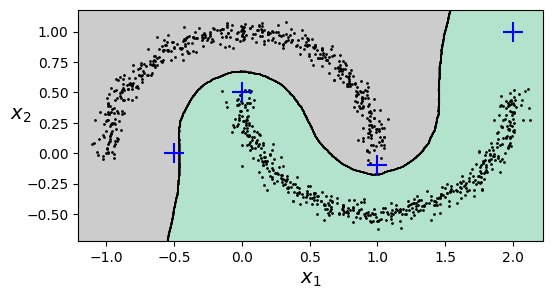

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

# **Gaussian Mixtures**

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
kmeans.cluster_centers_

array([[ 0.43906281,  0.80241779],
       [ 0.98503072, -0.28873482],
       [-0.71628281,  0.58054187],
       [ 0.16826306,  0.01027442],
       [ 1.83208484,  0.02324842]])

<ipython-input-50-11db7847105f>:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-50-11db7847105f>:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


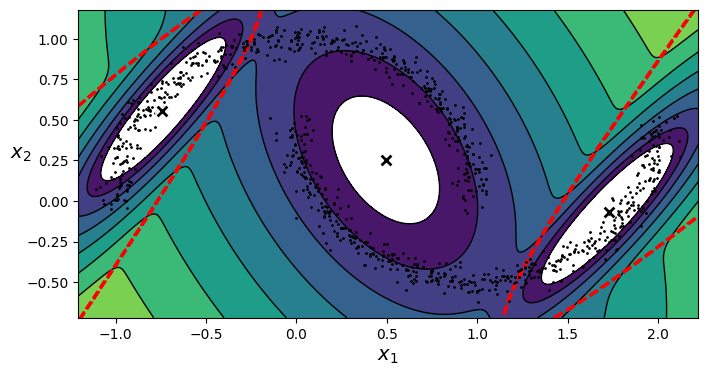

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

In [ ]:
gm.weights_

array([0.20453936, 0.58686271, 0.20859793])

In [ ]:
gm.means_

array([[-0.74503074,  0.55807632],
       [ 0.4950664 ,  0.25373843],
       [ 1.73110722, -0.06902321]])

In [ ]:
gm.covariances_

array([[[ 0.05459987,  0.06280737],
        [ 0.06280737,  0.09028234]],

       [[ 0.16337036, -0.09692064],
        [-0.09692064,  0.28734238]],

       [[ 0.06102278,  0.06561808],
        [ 0.06561808,  0.08773031]]])

In [ ]:
gm.predict(X)

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1,

In [ ]:
gm.predict_proba(X)

array([[9.12595056e-014, 1.00000000e+000, 2.30146837e-081],
       [7.47233037e-120, 9.99660066e-001, 3.39933511e-004],
       [2.17446845e-107, 9.99999051e-001, 9.48577999e-007],
       ...,
       [1.43718998e-182, 1.58138088e-002, 9.84186191e-001],
       [9.99684465e-001, 3.15534827e-004, 1.66671181e-161],
       [4.32492679e-045, 1.00000000e+000, 5.19983644e-039]])

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.99267589,  0.4439109 ],
       [ 0.49246053,  0.09656353],
       [ 0.27618108,  1.18432617],
       [ 1.80659921,  0.09721577],
       [ 1.87238905,  0.04052578],
       [ 1.80112752, -0.24369427]])

In [ ]:
y_new

array([0, 1, 1, 2, 2, 2])

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

<ipython-input-50-11db7847105f>:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-50-11db7847105f>:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


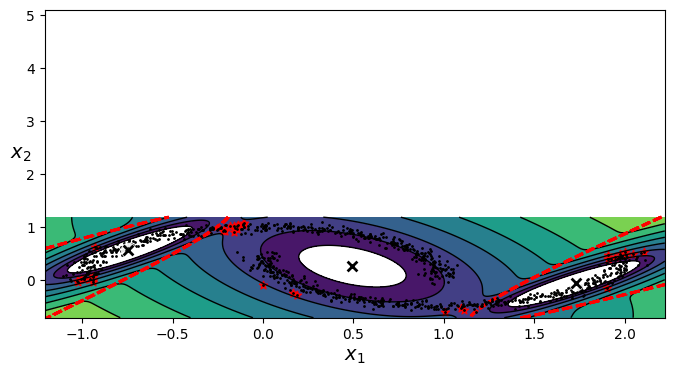

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.12, 0.12, 0.13, 0.16, 0.12, 0.13, 0.14, 0.  , 0.08, 0.  ])

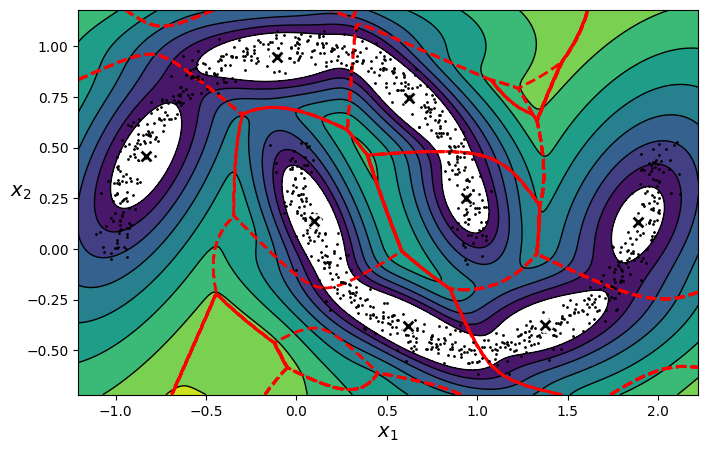

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()